# Performance Marketing Enhanced by Data Science Applications

In this AI era, data science has evolved as a powerful tool for the companies looking to elevate their marketing strategies and gain a competitive edge. Companies like Netflix, Amazon, Meta and others heavily depend on data science for their marketing stratgies. Data-driven insights are important, integrating data science into marketing efforts has become a crucial strategy for staying ahead in today's world.


### The Challenge of Marketing Optimization

Marketing campaigns can take many forms, from pay-per-click advertising and email marketing to social media promotions and content marketing. Each campaign comes with its own set of variables, such as ad creatives, target audiences, bidding strategies, and more. Marketers are tasked with finding the winning combination that maximizes their objectives, whether it's clicks, conversions, or ROI.

### Algorithms for Marketing

Common methods involve fixed strategies or A/B testing, which can be time-consuming and may not always yield the best results.However, there's a powerful and adaptive approach gaining traction in the marketing world: Thompson Sampling. Thompson Sampling is a popular algorithm used in the context of reinforcement learning and multi-armed bandit problems. While it is typically not directly associated with traditional performance marketing, it can be applied in certain scenarios to optimize marketing campaigns and resource allocation.

### Thompson Sampling Algorithm

Thompson Sampling, also known as Bayesian Bandit or Probability Matching, is a probabilistic algorithm used in the field of machine learning and reinforcement learning for solving the multi-armed bandit problem and related decision-making problems. It's named after its developer, William R. Thompson.

The multi-armed bandit problem in which an agent must decide which arm (option or action) to pull in a series of trials, each associated with a certain reward. So the question is how do you play multiple of these machines to maximize returns?

The assumption is that each of these machines has a distribution of outcomes, but the problem is that you don't know these distributions in advance.

So the goal is to figure out which of the bandits has the most favorable distribution.

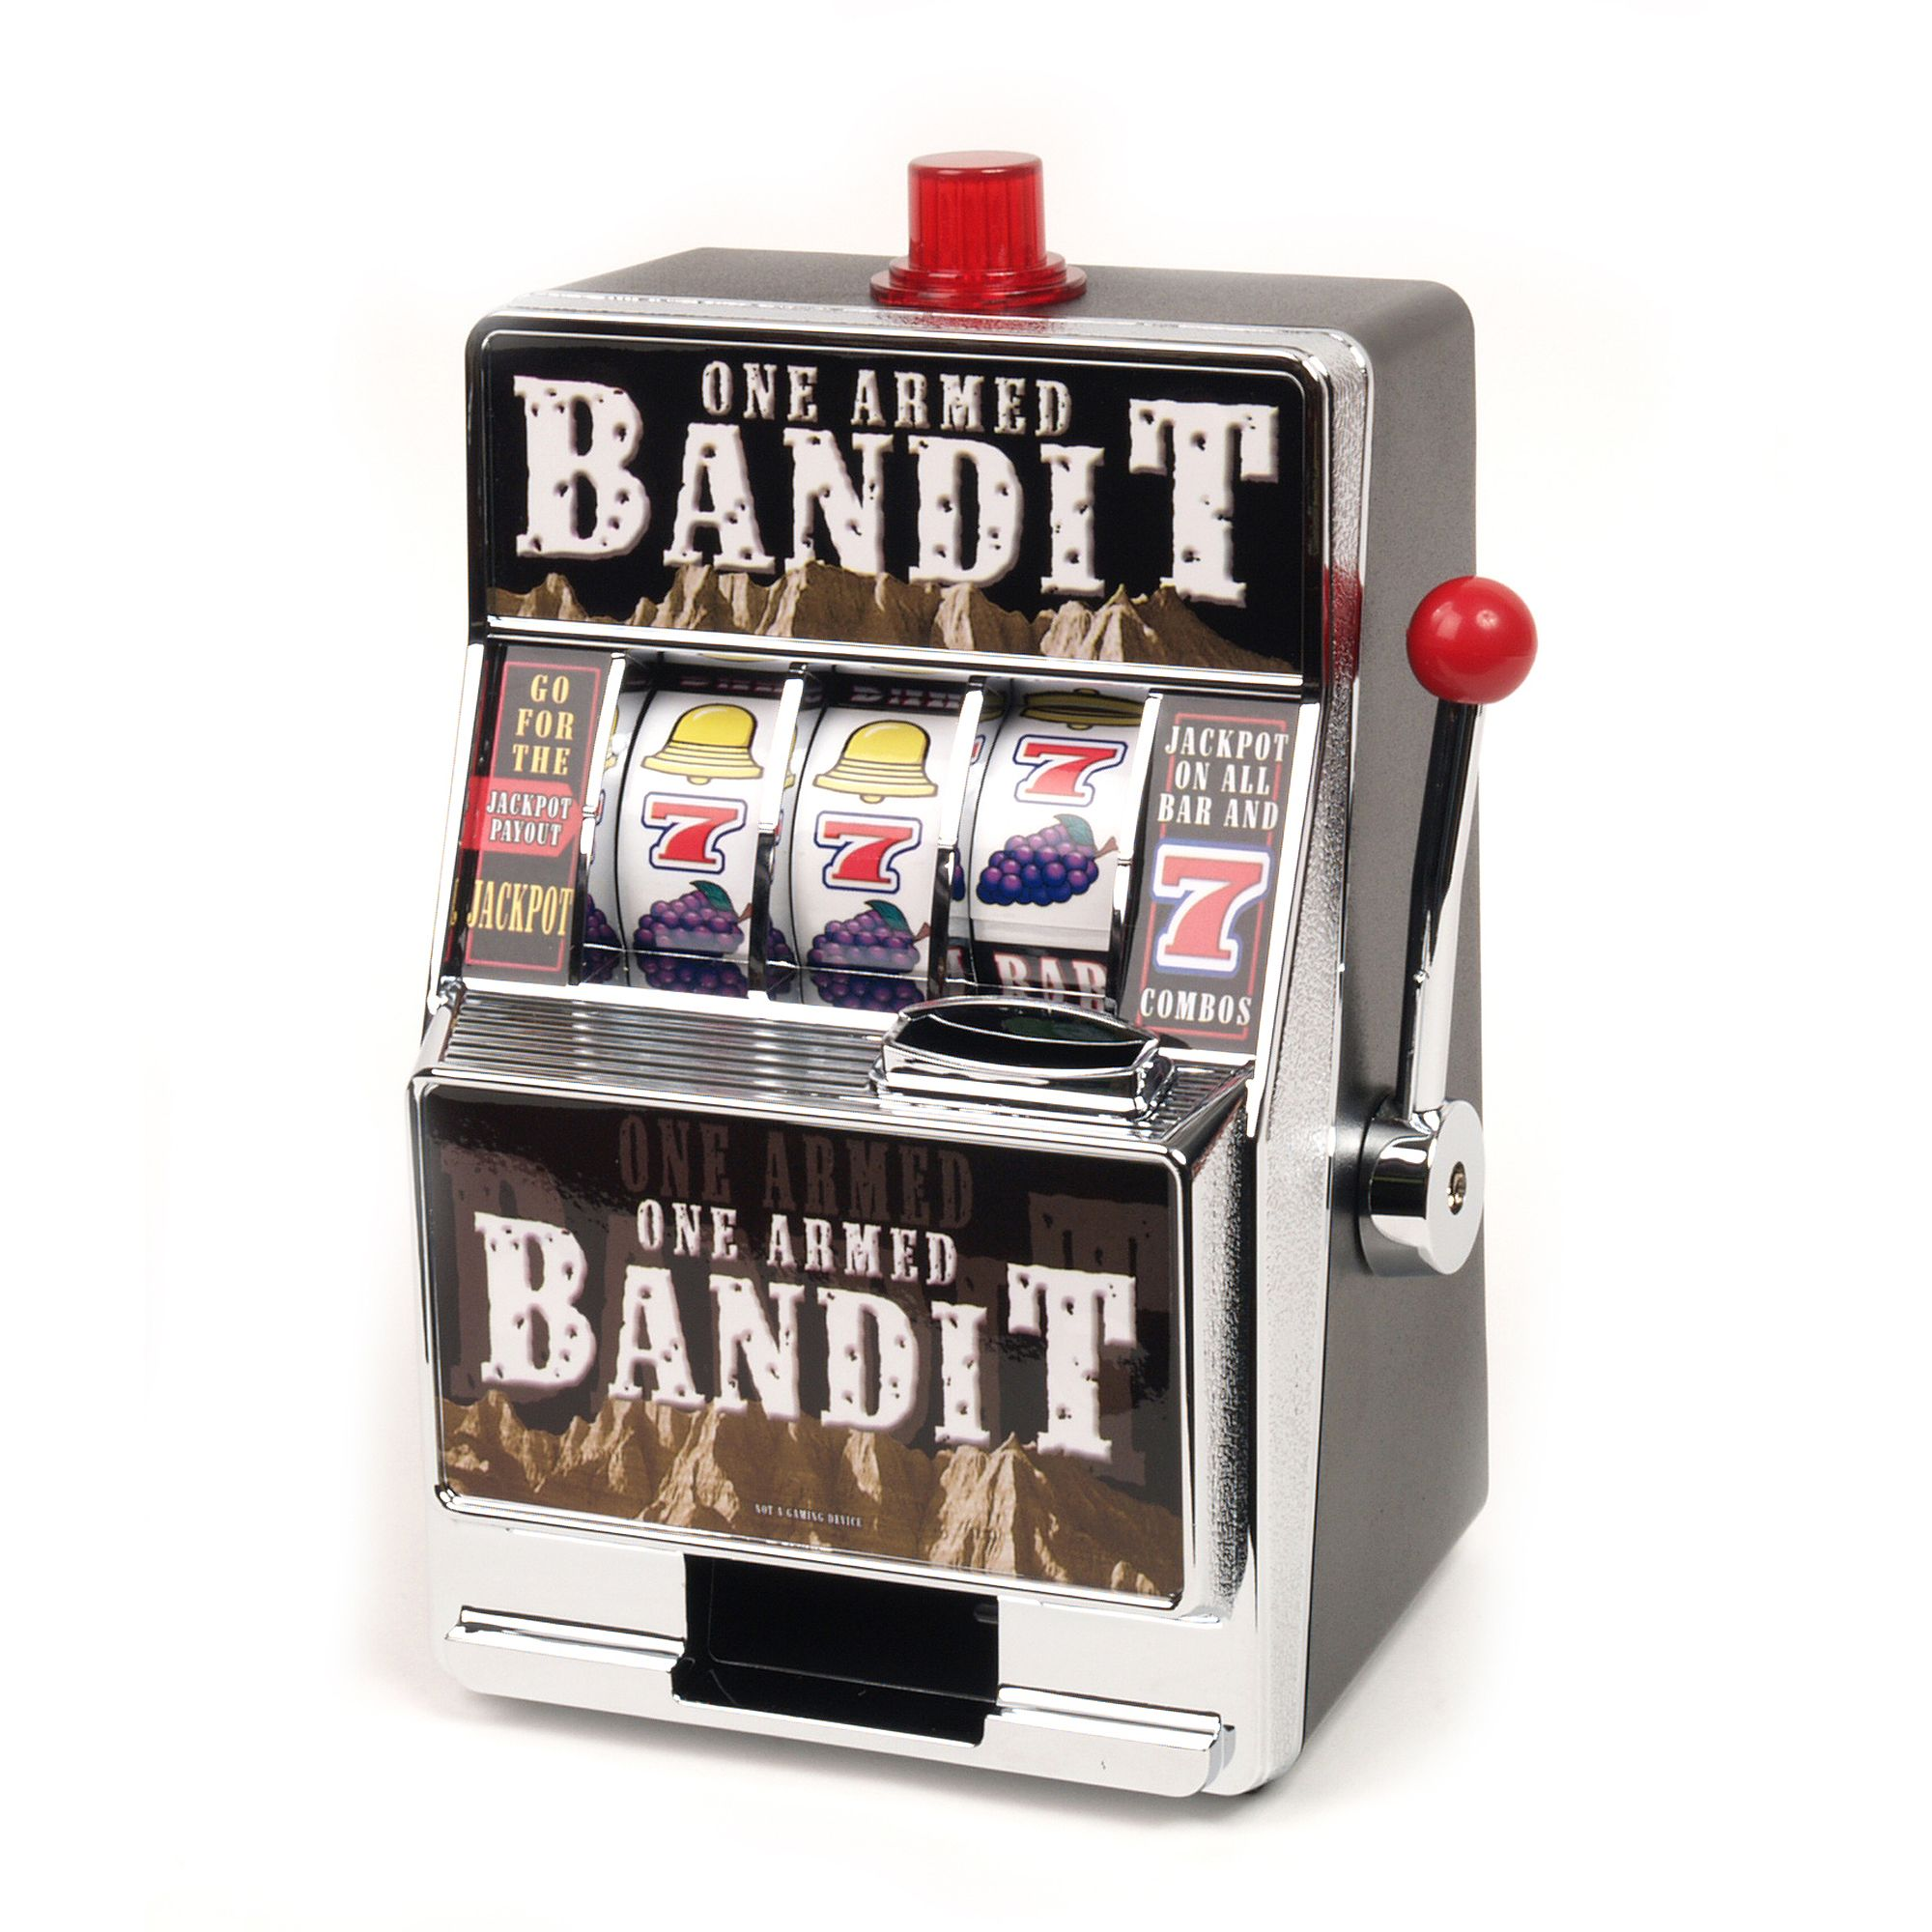

There's a bit of a tradeoff, the longer it takes to figure out which choice is the best. The more chance there is to lose money on options that aren't so good.This situation is often called the exploration-exploitation dilemma. It means you have to try different things to see which one is the best, but you also need to use what you already know as soon as you can.

This is a bit tricky because if you keep trying new things for too long without using what you've learned, you might feel sorry later. But if you use what you know too quickly, you might not realize there's a better option because you didn't explore enough.




## Maximizing Customer Enrollement Using Thompson Sampling

### Problem Definition
Here we're going to assume the online store has many existing customers,and the goal of the marketing team is to get the maximum number of customers to get enrolled into their new program called "Boost Program".
Lets assume the marketing team has 10 different advertisement channels with atleast 2 features

Each of the features will be different for each channel, but in general will include include:

1. An ad - In the form of banner , post, image or link
2. A sign-up form - The mechanism through which customers can enroll in the "Boost Program."

### Goal 
Our primary objective is to identify the most effective advertising channel that will generate the highest enrollment of customers into the "Boost Program."

To accomplish it, we will conduct experiments using the 5 different channels/sites on a customer-by-customer basis. The action in this context involves selecting one of the 10 ads to display. Initially, ad selection will be based on historic data. However, we will progressively implement the Thompson Sampling algorithm to optimize ad selection based on observed outcomes.


### Defining Success of the Program
To measure the effectiveness of our advertising channels, we will use a simple success criterion. When a customer interacts with an advertisement and subsequently enrolls in the "Boost Program," we will consider it a successful outcome, denoted as a reward of 1. If the customer does not enroll, it will be regarded as an unsuccessful outcome, with a reward of 0.

Our main aim is to identify the advertising channel that maximizes the enrollment rate, and we will employ the Thompson Sampling algorithm to guide our decision-making process.

### Understanding the Thompson Sampling Algorithm
The Thompson Sampling algorithm operates on the premise that each advertising channel has an associated probability distribution. To determine the most effective channel, we need to explore each strategy to gather data.

As the trials progress, the algorithm constructs a distribution for each channel based on the observed returns. It's important to note that these distributions are not attempts to guess the exact distribution underlying each channel. Instead, the algorithm constructs distributions that indicate where it believes the true expected value might lie.

With each round of data, our perception of the underlying probability distribution is updated. This iterative process continues until we have substantially refined our understanding of the distributions. We can proceed to implement this algorithm in Python to optimize our advertising channel.

#### Python Implementation

In [187]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
data_path = '/Users/arpitajaiswal/Downloads/Ads_CTR_Optimisation.csv'

my_data_frame=df = pd.read_csv(data_path)
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [188]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [189]:
# Total Clicks for each Ad Channel according to the data provided

total_clicks = []
for i in range(0,10):
    total_clicks.append(sum(df.iloc[:,i:i+1].values))
    
total_clicks = [int(item) for item in total_clicks]
    
total_clicks_arr = np.array(total_clicks)
total_clicks_arr = total_clicks_arr.reshape(1,10)

total_clicks_df = pd.DataFrame(data=total_clicks_arr, columns=df.columns, index=['Total Clicks'])
total_clicks_df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
Total Clicks,1703,1295,728,1196,2695,126,1112,2091,952,489


As per the historic data Ad5 should be the top perforimng channel. Lets check whether we get the same after applying the algorithm or not.

In [190]:
#Applying Thompson Sampling on the dataset

def thompson_sampling(N, num_ads, df):
    total_reward = 0
    chosen_ads = []
    ones = [0] * num_ads
    zeros = [0] * num_ads

    for n in range(1, N):
        chosen_ad = 0
        max_beta = 0

        for i in range(num_ads):
            random_beta = random.betavariate(ones[i] + 1, zeros[i] + 1)
            
            if random_beta > max_beta:
                max_beta = random_beta
                chosen_ad = i

        chosen_ads.append(chosen_ad)
        reward = df.values[n, chosen_ad]

        if reward == 1:
            ones[chosen_ad] += 1
        else:
            zeros[chosen_ad] += 1

        total_reward += reward

    # Calculate the total rewards for each ad
    ad_rewards = [0] * num_ads
    for i in range(num_ads):
        ad_rewards[i] = ones[i]

    # Rank the ads by total rewards (descending order)
    ranked_ads = sorted(range(num_ads), key=lambda i: ad_rewards[i], reverse=True)

    # Get the top three best-performing ads
    top_three_ads = ranked_ads[:3]

    return total_reward, chosen_ads, top_three_ads

total_reward, chosen_ads, top_three_ads = thompson_sampling(N=10000, num_ads=10, df=my_data_frame)
print(f'Total Reward: {total_reward}')
 
top_three_ad_names = [f'Ad {i + 1}' for i in top_three_ads]

# Print the names of the top-performing ads
print("Top Three Best-Performing Ads:")
for ad_name in top_three_ad_names:
    print(ad_name)

Total Reward: 2598
Top Three Best-Performing Ads:
Ad 5
Ad 8
Ad 3


In [191]:
# Total number of times each ad being selected by Thompson Sampling Algorithm

ads_selected = []
for i in range(0,10):
    ads_selected.append(chosen_ads.count(i))
    
ads_selected_arr = np.array(ads_selected)
ads_selected_arr = ads_selected_arr.reshape(1,10)

ads_selected_df = pd.DataFrame(data=ads_selected_arr, columns=df.columns, index=['Ads_Selected'])
ads_selected_df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
Ads_Selected,67,45,84,34,9271,25,51,355,42,25


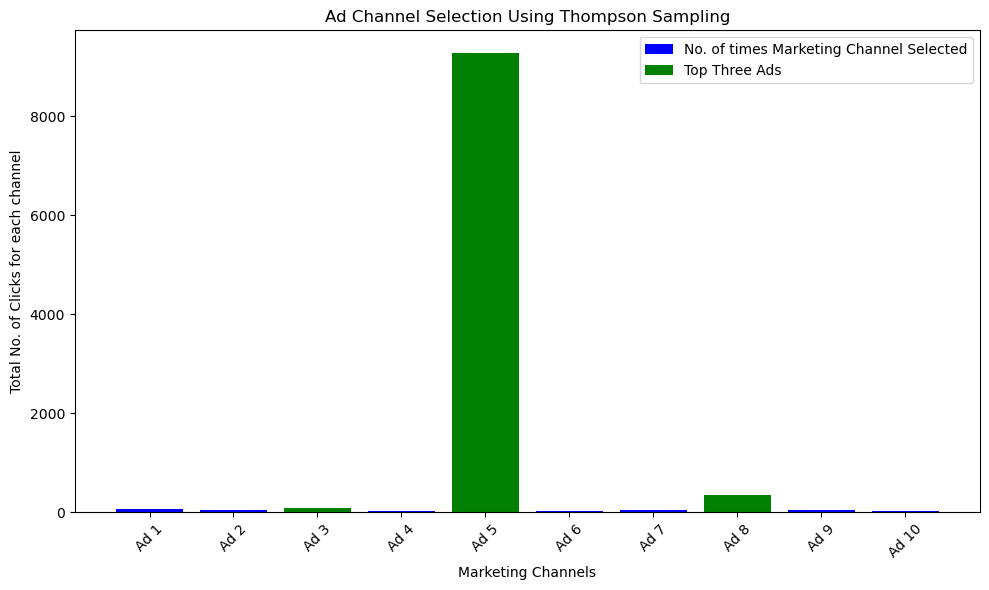

In [193]:
#Plotting a histogram for the obtained distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a list to count the number of times each ad was chosen
channel_selection = []
for i in range(10):
    channel_selection.append(chosen_ads.count(i))

# Create a DataFrame to store the Total Number of Clicks
channel_selection_df = pd.DataFrame(data=[channel_selection], columns=df.columns, index=['No. of times Marketing Channel Selected'])

# Create a bar plot to visualize the Total Number of Clicks
plt.figure(figsize=(10, 6))
plt.bar(channel_selection_df.columns, channel_selection_df.values[0], color='blue', label='No. of times Marketing Channel Selected')

# Highlight the top three chosen ads with a different color
highlighted_ads = [f'Ad {i + 1}' for i in top_three_ads]
highlighted_counts = [channel_selection[i] for i in top_three_ads]
plt.bar(highlighted_ads, highlighted_counts, color='green', label='Top Three Ads')

# Add labels and legend
plt.xlabel('Marketing Channels')
plt.ylabel('Total No. of Clicks for each channel')
plt.title('Ad Channel Selection Using Thompson Sampling')
plt.legend()

plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Conclusion 

Based on the dataset analysis, it's evident that Ad5 stands out as the top-performing channel. Focusing a significant portion of our marketing campaigns on Ad5 could greatly benefit the company and contribute to achieving success.

# Survey Data Analysis: Evaluating User Preferences in Online Shopping Applications 


### Problem Definition
Next we have a dataset for an online Survey conducted on a question asking  "What social platform has influenced your online shopping". Over the survey only 5 sites were provided which a could be selected as an answer. This survey could help in targeting the channel/ site where we could target the ads for a product to gain more profits and saving in the marketing budget. 

### Goal 

Specifically, the goal is to maximize the cumulative reward over a series of rounds by choosing the channel with the highest probability of success (reward = 1) while minimizing selections that result in a lack of success (reward = 0). This algorithm aims to identify the most effective online shopping channels to target for advertising in order to increase profits and save on marketing expenses.


### Using Thompson Sampling
Thompson Sampling provides an effective way to balance exploration (trying different platforms) and exploitation (choosing the most promising platform). This balance is crucial in a dataset like ours, where we want to gather insights while also capitalizing on the best-performing platforms.
As our dataset grows and we gather more data on user choices and their impact, Thompson Sampling allows us to continuously learn and adapt our strategies. It updates our beliefs about platform effectiveness in real-time, making it a natural fit for our evolving dataset.

### Python Implementation

In [250]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
data_path_2 = '/Users/arpitajaiswal/Downloads/survey_data.csv'

my_data_frame_2=df = pd.read_csv(data_path_2)
df.head()
# Remove the specified columns
my_data_frame_2 = my_data_frame_2.drop(['Segment Type', 'Segment Description'], axis=1)

# Display the resulting DataFrame
print(my_data_frame_2)

# Use pd.crosstab to pivot "Answer" data as separate columns
pivot_data = pd.crosstab(index=my_data_frame_2.index, columns=my_data_frame_2['Answer']).reset_index()

# Remove the index column

pivot_data = pivot_data.drop(columns=['row_0'])

# Display the resulting DataFrame
print(pivot_data)

                                               Question     Answer
0     What social platform has influenced your onlin...   Facebook
1     What social platform has influenced your onlin...  Instagram
2     What social platform has influenced your onlin...   Snapchat
3     What social platform has influenced your onlin...    Twitter
4     What social platform has influenced your onlin...   Facebook
...                                                 ...        ...
4697  What social platform has influenced your onlin...  Instagram
4698  What social platform has influenced your onlin...  Instagram
4699  What social platform has influenced your onlin...  Instagram
4700  What social platform has influenced your onlin...  Instagram
4701  What social platform has influenced your onlin...  Instagram

[4702 rows x 2 columns]
Answer  Facebook  Instagram  None  Snapchat  Twitter
0              1          0     0         0        0
1              0          1     0         0        0
2           

In [249]:
# Total Frequency of Online Channel Selection Based on the Provided Data

total_count = []
for i in range(0,5):
    total_count.append(sum(pivot_data.iloc[:,i:i+1].values))
    
total_count = [int(item) for item in total_count]
    
total_count_arr = np.array(total_count)
total_count_arr = total_count_arr.reshape(1,5)

total_count_df = pd.DataFrame(data=total_count_arr, columns=pivot_data.columns, index=['Total Count'])
total_count_df

Answer,Facebook,Instagram,None,Snapchat,Twitter
Total Count,1039,2220,1026,199,218


Instagram is the most commonly used online application for shopping among the users as per the survey. Lets check if we get the same result after applying Thompson Sampling or not.

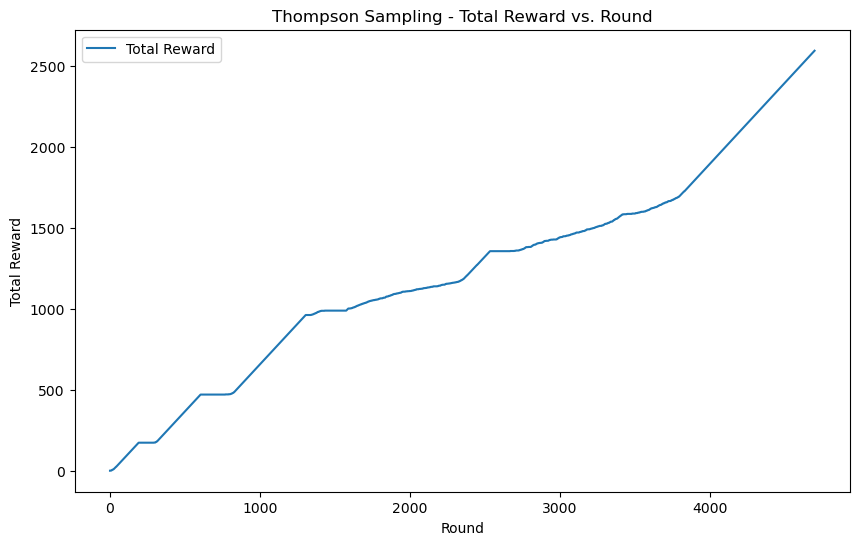

Total Reward: 2592


In [245]:
#Applying Thompson Sampling on the given dataset

def thompson_sampling(N, num_channels, df):
    total_reward_2 = 0
    chosen_channels = []
    total_rewards = [] 
    ones = [0] * num_channels
    zeros = [0] * num_channels

    for n in range(1, N):
        chosen_channel = 0
        max_beta = 0

        for i in range(num_channels):
            random_beta = random.betavariate(ones[i] + 1, zeros[i] + 1)
            
            if random_beta > max_beta:
                max_beta = random_beta
                chosen_channel = i

        chosen_channels.append(chosen_channel)
        reward = df.values[n, chosen_channel]

        if reward == 1:
            ones[chosen_channel] += 1
        else:
            zeros[chosen_channel] += 1

        total_reward_2 += reward
        
         # Append the total reward at each round to the list
        total_rewards.append(total_reward_2)

    # Plot the total rewards over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, N), total_rewards, label='Total Reward')
    plt.xlabel('Round')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.title('Thompson Sampling - Total Reward vs. Round')
    plt.show()


    # Calculate the total rewards for each channel
    channel_rewards = [0] * num_channels
    for i in range(num_ads):
        channel_rewards[i] = ones[i]
        
    # Rank the ads by total rewards (descending order)
    ranked_channels = sorted(range(num_channels), key=lambda i: channel_rewards[i], reverse=True)

    # Get the top three best-performing ads
    top_three_channels = ranked_channels[:3]


    return total_reward_2, chosen_channels, top_three_channels

total_reward_2, chosen_channels, top_three_channels = thompson_sampling(N=4700, num_channels=5, df=pivot_data)
print(f'Total Reward: {total_reward_2}')

In [246]:
#Calculating the total number of rewards receieved by each channel/ site
number_of_chosens = []
for i in range(0,5):
    number_of_chosens.append(chosen_channels.count(i))
    
number_of_chosens_arr = np.array(number_of_chosens)
number_of_chosens_arr = number_of_chosens_arr.reshape(1,5)

number_of_chosens_df = pd.DataFrame(data=number_of_chosens_arr, columns=pivot_data.columns, index=['Number of Chosens'])
number_of_chosens_df

Answer,Facebook,Instagram,None,Snapchat,Twitter
Number of Chosens,1079,1930,1662,9,19


In [247]:
#Finding the top performing channels in the survey
top_three_channel_names = [f'Channel {i + 1}' for i in top_three_channels]

# Print the names of the top-performing ads
print("Top Three Best-Performing Channels:")
for channel_name in top_three_channel_names:
    print(channel_name)

Top Three Best-Performing Channels:
Channel 2
Channel 3
Channel 1


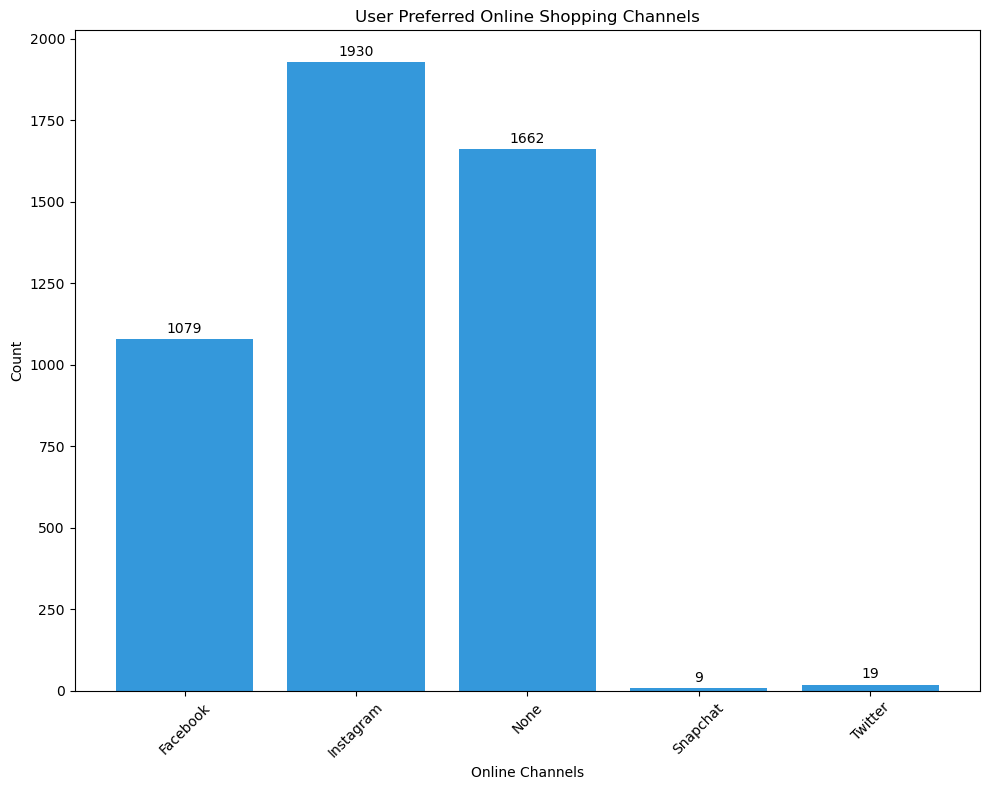

In [248]:
# Create a list to count the number of times each channel was chosen
selected_channel = []
for i in range(5):
    selected_channel.append(chosen_channels.count(i))

# Create a DataFrame to store the total number for selected channels
selected_channel_df = pd.DataFrame(data=[selected_channel], columns=pivot_data.columns, index=['No. of times Marketing Channel Selected'])
# Create a bar plot to visualize the total number for selected channels
plt.figure(figsize=(10, 8))
plt.bar(selected_channel_df.columns, selected_channel_df.values[0], color='#3498db', label='No. of times Marketing Channel Selected')

# Add data labels on top of bars
for i, v in enumerate(selected_channel_df.values[0]):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')


# Add labels 
plt.xlabel('Online Channels')
plt.ylabel('Count')
plt.title('User Preferred Online Shopping Channels')


plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Conclusion 
Instagram emerges as the top-performing online channel in our current analysis. It's important to note that as we continue to run the Thompson Sampling Algorithm and gather more data over time, we may observe different results, reflecting the dynamic nature of user preferences and platform effectiveness.

## Quiz Questions


Question 1: What is the primary purpose of Thompson Sampling in the context of multi-armed bandit problems?

 1. To allocate resources equally to all options.
 2. To balance exploration of different options with exploitation of the best-performing option.
 3. To allocate all resources to the option with the highest historical performance.

Answer: To balance exploration of different options with exploitation of the best-performing option.

Question 2: In Thompson Sampling, what does "exploration" refer to?

 1. Allocating resources to the best-performing option.
 2. Trying different options to learn their performance.
 3. Maximizing immediate rewards.

Answer: Trying different options to learn their performance.

Question 3: What is the purpose of the ones and zeros lists in the Thompson Sampling code?

 1. They store the number of users who clicked on ads.
 2. They track the total rewards for each ad.
 3. They keep count of successes (1s) and failures (0s) for each ad.

Answer: They keep count of successes (1s) and failures (0s) for each ad.

Question 4: What data does the number_of_chosens_df DataFrame in your code visualize?

 1. The number of times each ad was chosen by the Thompson Sampling algorithm.
 2. The conversion rates of the ads.
 3. The total budget allocated to each ad.

Answer: The number of times each ad was chosen by the Thompson Sampling algorithm.

Question 5: Why is it important to visualize resource allocation and conversion rates over time?

 1. It helps in choosing ads randomly.
 2. It allows monitoring the algorithm's performance and adaptation.
 3. It simplifies the process of ad selection.

Answer: It allows monitoring the algorithm's performance and adaptation.

Question 6: How can you adapt the code to track and visualize resource allocation more accurately?

 1. By removing the resource allocation component.
 2. By keeping the allocation budget constant.
 3. By updating allocation budgets based on optimization goals and strategies.

Answer: By updating allocation budgets based on optimization goals and strategies.

Question 7: What is the significance of highlighting the top three chosen ads in the visualizations?

 1. It ensures that those ads will always be chosen.
 2. It prevents exploration of other ads.
 3. It shows which ads the algorithm currently believes are the most promising.

Answer: It shows which ads the algorithm currently believes are the most promising.

Question 8: In the context of Thompson Sampling, what does "exploitation" refer to?

 1. Trying different options to learn their performance.
 2. Balancing the exploration of options.
 3. Focusing on the best-performing option based on historical data.

Answer: Focusing on the best-performing option based on historical data.

Question 9: How does the algorithm adapt resource allocation over time?

 1. It allocates more resources randomly.
 2. It allocates more resources to the top-performing options.
 3. It allocates the same resources to all options.

Answer: It allocates more resources to the top-performing options.

Question 10: 
What should be considered when interpreting the results of Thompson Sampling?

 1. The algorithm guarantees the absolute best-performing ads.
 2. The results are probabilistic and based on historical data.
 3. The algorithm only explores one ad at a time.

Answer: The results are probabilistic and based on historical data.